<a href="https://colab.research.google.com/github/vegger/MLDM/blob/main/preclass/MLDM_HS22_L06_SVM_PRE_CLASS_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L06 - Support Vector Machines (SVM's)

NOTE: 
- To execute all code and see the results in COLAB, click on menu "Runtime" -> "Execute all"  or press CTRL-F9
- To execute a single cell, press CTRL-Return (or SHIFT-Return to jump to next cell afterwards)

# Introduction

**Support Vector Machines (SVM's)** are one of the most popular and widely used supervised machine learning algorithms. In the basic version, they solve binary classification problems. 

### TASK: For a brief introduction to SVM's, please watch the following video (2min): https://www.youtube.com/watch?v=_YPScrckx28 

In the following, we will explain SVM's in more detail. For this, we are assuming the following setting of a *classification problem*: 
Given are m samples $x^{(i)}, y^{(i)}$, where each $x^{(i)}$ consists of n features, and each $y^{(i)} \in \{0,1\}$ denotes the class of sample $(i)$. 




Excurse: Hyperplane

A *hyperplane* is a generalization of a line (in 2d) or a plane (in 3d) to the n-dimensional space (see image below). It is an n-1-dimensional subspace.

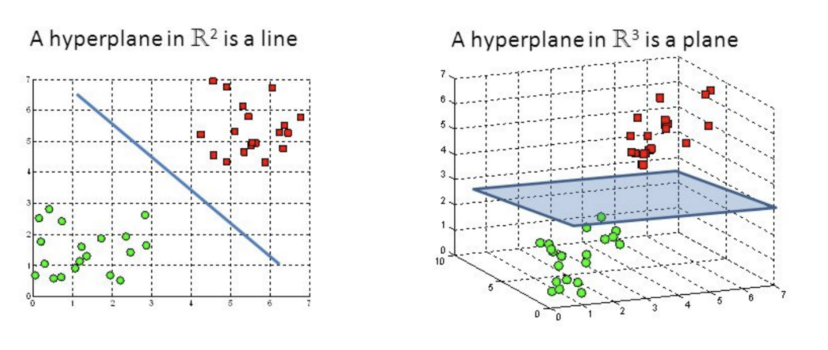

The objective of the Support Vector Machine algorithm is to find a hyperplane in the n-dimensional space (n = the number of features) that separates the given samples according to their class labels. In general, there are many such hyperplanes, as shown in the following image. The SVM choses a hyperplane such that its *margin* (the distance between the hyperplane and the closest samples to either side) is maximum. Those samples which are closest to the hyperplane, i.e. which lie on the margin, are called *support vectors* (the blue dot and the two red squares in the image below). 






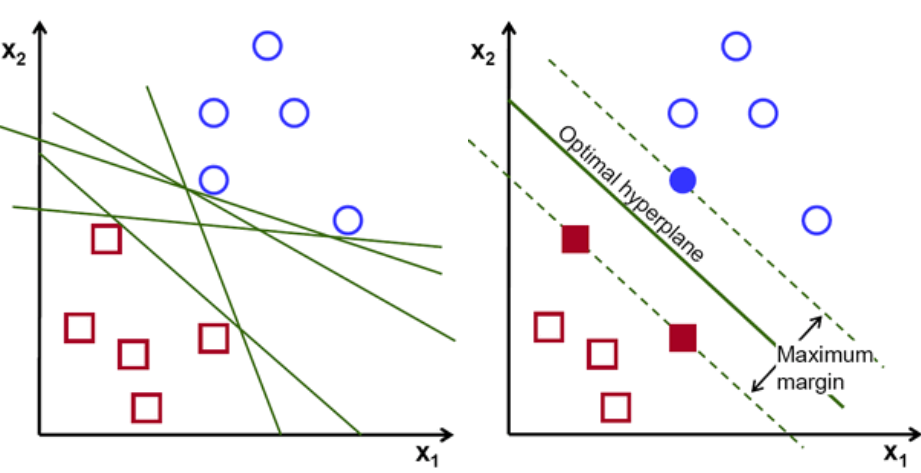

(source: https://miro.medium.com/max/921/1*06GSco3ItM3gwW2scY6Tmg.png)

In order to find such a hyperplane, the SVM algorithm solves a non-linear optimization problem that maximizes the width of the margin: 

$ min_w \frac12 \|w\|^2$

subject to $y^{(i)} (x^{(i)} \cdot w + b) \geq 1$   for $i = 1...m$

For more details, see the optional Section "Mathematical Foundations" at the end of this text.  


# Slack Variables and C-Parameter

In many cases, the data cannot be perfectly seperated - or trying to fit in a maximum margin classifier could result in overfitting the model. Here is an instance of such data:


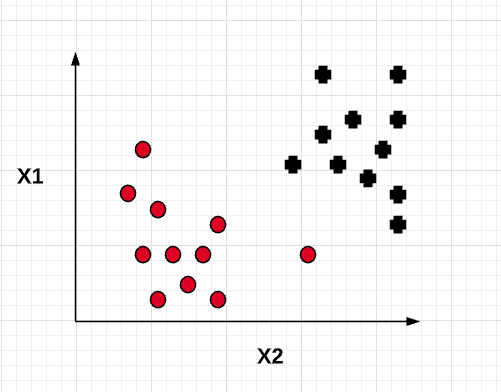

Trying to fit a maximum margin classifier will result in a model such as the following. 

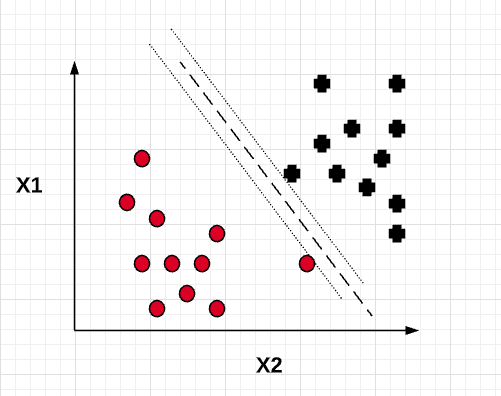

However, if we would allow the model to ignore the right-most red dot (which seems to be an outlier), we could obtain a hyperplane with a much larger margin.


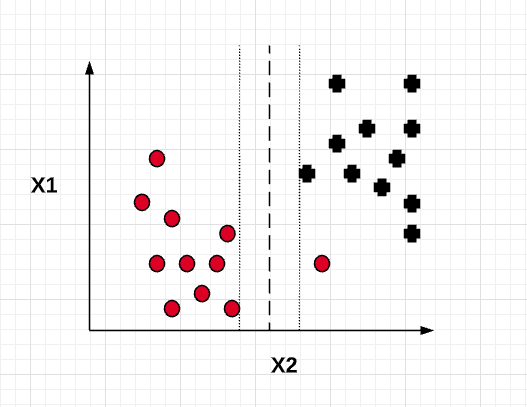

Thus, the idea is to relax the goal for separating *all* samples, and instead allow a certain amount of misclassifications, under appropriate cost penalization. Such a *soft margin classifier* is achieved by introducing *slack variables $\xi^{(i)}$ for each sample $x^{(i)}$. These slack variables measure how far each sample is on the wrong side of the hyperplane - and they are set to zero if the sample is on the correct side. Then we extend the optimization problem for soft margin SVM as follows: 

$ min_w \biggl(\frac12 \|w\|^2 + C \frac 1m \sum_{i = 1}^m \xi^{(i)} \biggr)$

subject to $y^{(i)} (x^{(i)} \cdot w + b) \geq (1-\xi^{(i)})$ and $\xi^{(i)} \geq 0$    for $i = 1...m$



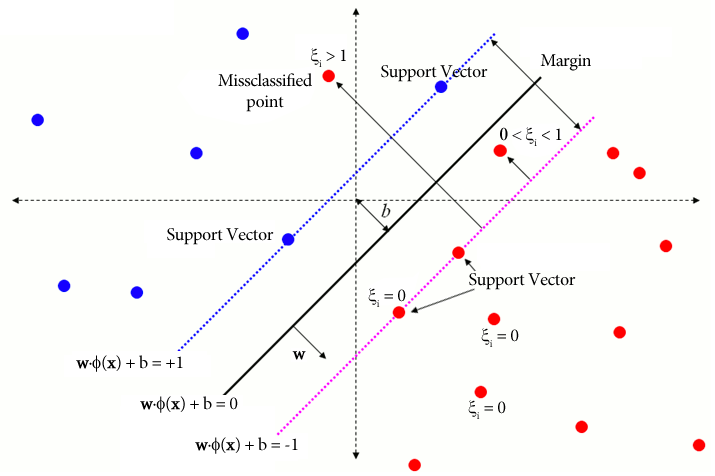

(source: https://aiap.rbind.io/support-vector-machines.html)

The C value in the above objective function if a hyperparameter that controls the penalty of misclassification. Large values of C would result in solutions with little or no misclassifications, and smaller values of C will result a higher tendency for  misclassification. In other words, the value of C can be used to control the width of the margin. 

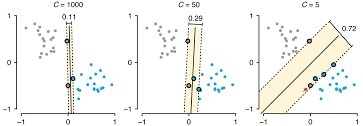

(source: https://editor.analyticsvidhya.com/uploads/94201C.png)

### Kernel Trick
Sometimes, the sample data points are not separable using a linear hyperplane. In such a situation, SVMs use a *kernel trick* to transform the input space to a higher dimensional space. 

For instance, in the image below it is clear that the data cannot be seperated with a linear function. However, we can introduce a new dimension z, which is computed with a mapping function (e.g. as $z = x^2 + y^2$). The resulting points will be in 3-D, and in this new space, we can easily segregate the data points using linear separation.


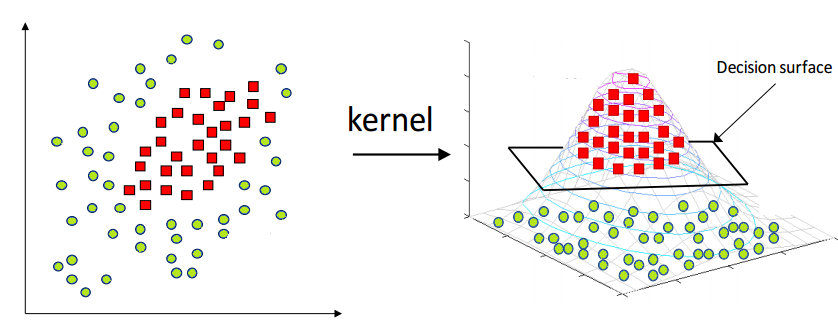

(source: https://miro.medium.com/max/1400/1*mCwnu5kXot6buL7jeIafqQ.png)

There exist several standard kernels such as linear or polynomial kernels. 

One of the most powerful kernels is RBF - Radial Basis Function Kernel - which can map the input space into an infinite dimensional space, and thus can be used to separate arbitrary shapes of data. The RBF kernel comes with a hyperparameter $\gamma \geq 1$ that controls the shape of the decision boundary: the larger $\gamma$ the more wiggly the boundary and the higher the tendency for overfitting. 

Following image shows how $C$, the penalty for misclassification, and $\gamma$, the RBF parameter, play together when fitting complex data. 

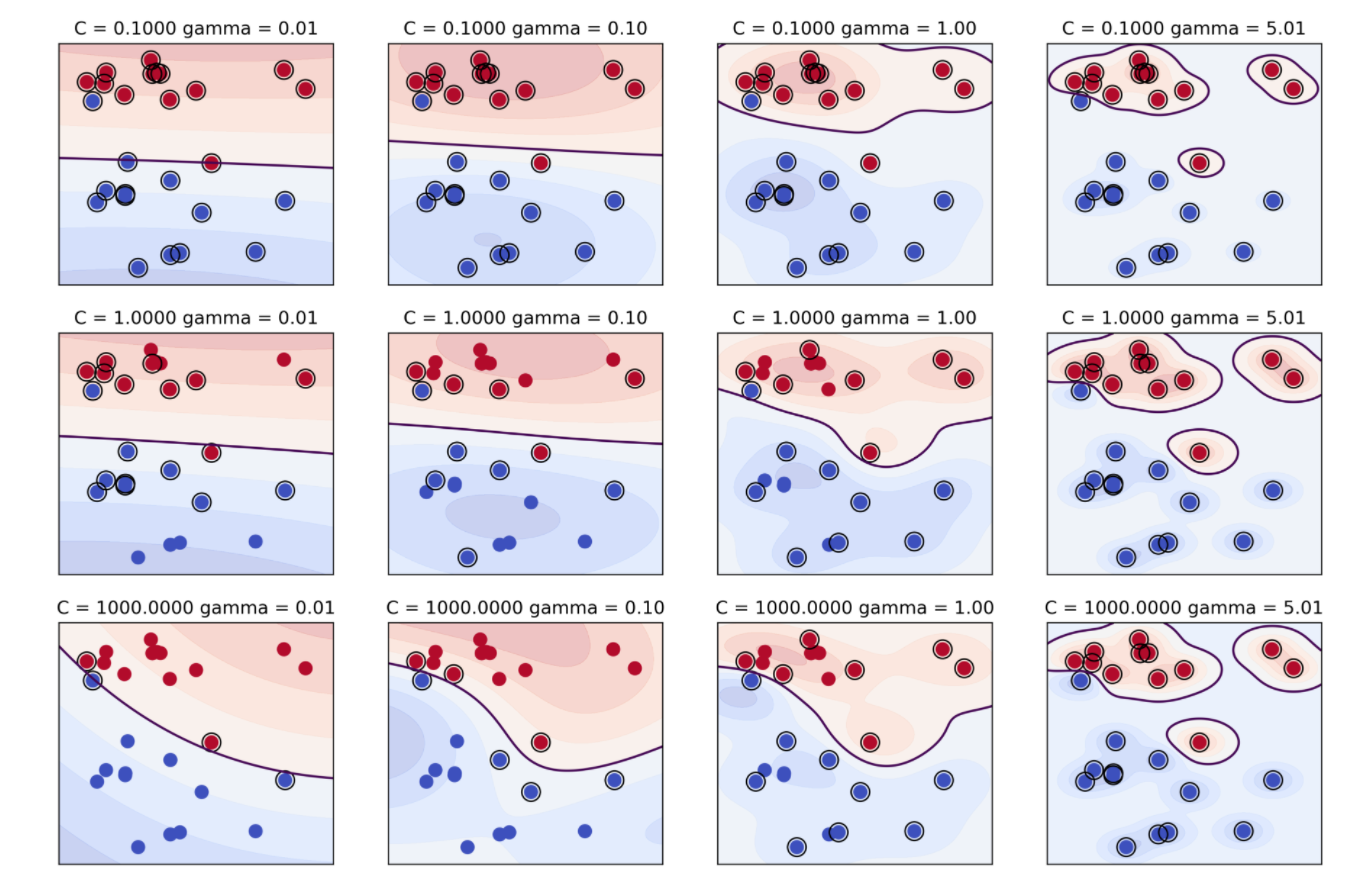

(source: https://amueller.github.io/aml/_images/svm_c_gamma.png)

### More on Kernels [not part of exam]
Kernels are a powerful tool for SVM's. The video at https://www.youtube.com/watch?v=e4qWknGNzB0 (27 min) gives a deeper intuition of how kernels for SVM's work, and the blog post at https://amueller.github.io/aml/02-supervised-learning/07-support-vector-machines.html presents the mathematical background. 

### Trivia: Who invented SVM's [not part of exam]
The original SVM algorithm was developed by Vladimir N Vapnik and Alexey Ya. Chervonenkis in 1963. At that time, the algorithm was in early stages. The only possibility was to draw hyperplanes for linear classifier. In 1992, Bernhard E. Boser, Isabelle M Guyon and Vladimir N Vapnik suggested a way to create non-linear classifiers by applying the kernel trick to maximum-margin hyperplanes. The currently used approach was proposed by Corinna Cortes and Vapnik in 1993 and published in 1995.

# Mathematical Foundations of SVM's [not part of exam]

If you want to dive deeper into SVM's, one way is to understand the mathemathics behind. There is a great lecture by Patrick Winston, MIT, where he explains in detail HOW an SVM constructs its solution (45 minutes): 
https://youtu.be/_PwhiWxHK8o


### Sources
This text is based on images and extracts from the following tutorials: 
- Datacamp - Tutorial on SVM's: https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
- Rohith Ghandi - Introduction to SVM's: https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47
- kaggle - SVM Tutorial: https://www.kaggle.com/code/prashant111/svm-classifier-tutorial/notebook
- Ajitesh Kumar - SVM as Soft Margin Classifier: https://vitalflux.com/svm-soft-margin-classifier-c-value-importance


#Next Step: Please answer the quizzes on Moodle now